<a href="https://colab.research.google.com/github/LCaravaggio/AnalisisPredictivo/blob/master/03_Regresi%C3%B3n_Lineal/Regresi%C3%B3n_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerías
###Se importan la librerias a utilizar

In [1]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

#Preparar la data
###Importamos los datos de la misma librería de scikit-learn

In [2]:
boston = datasets.load_boston()
print(boston)
print()

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

###Entendimiento del dataset

In [3]:
print('Información en el dataset:')
print(boston.keys())
print()

Información en el dataset:
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])



In [4]:
print('Características del dataset:')
print(boston.DESCR)

Características del dataset:
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per 

In [5]:
print('Cantidad de datos:')
print(boston.data.shape)
print()

Cantidad de datos:
(506, 13)



In [6]:
print('Nombres columnas:')
print(boston.feature_names)

Nombres columnas:
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


#Regresión Lineal Simple

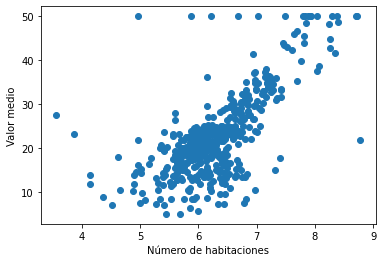

In [7]:
#Seleccionamos solamente la columna 5 del dataset
X = boston.data[:, np.newaxis, 5]
#Defino los datos correspondientes a las etiquetas
y = boston.target
#Graficamos los datos correspondientes
plt.scatter(X, y)
plt.xlabel('Número de habitaciones')
plt.ylabel('Valor medio')
plt.show()

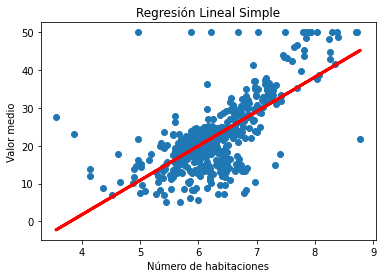

DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":
[9.10210898]
Valor de la intersección o coeficiente "b":
-34.67062077643857

La ecuación del modelo es igual a:
y =  [9.10210898] x  -34.67062077643857

Precisión del modelo:
0.48352545599133423


In [8]:
lr = linear_model.LinearRegression()
lr.fit(X, y)
Yest = lr.predict(X)

plt.scatter(X, y)
plt.plot(X, Yest, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
plt.xlabel('Número de habitaciones')
plt.ylabel('Valor medio')
plt.show()

print('DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('y = ', lr.coef_, 'x ', lr.intercept_)
print()
print('Precisión del modelo:')
print(lr.score(X, y))

#Implementación con Split de Datos

In [10]:
from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#Defino el algoritmo a utilizar
lr = linear_model.LinearRegression()
#Entreno el modelo
lr.fit(X_train, y_train)
#Realizo una predicción
Y_pred = lr.predict(X_test)

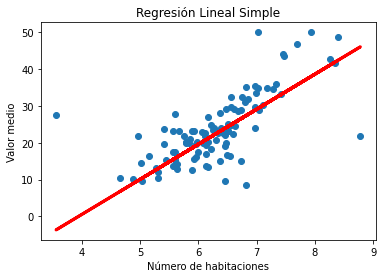


DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":
[9.53016833]
Valor de la intersección o coeficiente "b":
-37.62687727775578

La ecuación del modelo es igual a:
y =  [9.53016833] x  -37.62687727775578

Precisión del modelo:
0.48848856715864275


In [11]:
#Graficamos los datos junto con el modelo
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
plt.xlabel('Número de habitaciones')
plt.ylabel('Valor medio')
plt.show()
print()
print('DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('y = ', lr.coef_, 'x ', lr.intercept_)
print()
print('Precisión del modelo:')
print(lr.score(X_train, y_train))

In [12]:
# Score de testeo
print(lr.score(X_test, y_test))

0.4412140703904328


#Implementación con StatsModel

In [13]:
import pandas as pd
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [14]:
df=pd.DataFrame(data=np.column_stack((X,y)),columns=['X','y'])

formula = 'y ~ X'

lm = smf.ols(formula=formula, data=df).fit()
print(lm.params)

lm.rsquared

Intercept   -34.670621
X             9.102109
dtype: float64


0.483525455991334

In [15]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 18 Apr 2022   Prob (F-statistic):           2.49e-74
Time:                        22:24:54   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
X              9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
lm.predict()
predictions = lm.params['X'] * df['X'] + lm.params['Intercept']
error = predictions - df['y']

In [17]:
A=pow(df['y']-predictions,2).sum()
B=pow(df['y']-df['y'].mean(),2).sum()
R=1-(A/B)

R

0.4835254559913341

In [18]:
R_square = (df['y'].var()-error.var())/df['y'].var()
R_square

0.48352545599133423